In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
datos = pd.read_csv ('dow_jones_index.csv')


columnas = ['accion', 'fecha', 'precio']

df= pd.read_csv ('dow_jones_index.csv',
                usecols=[1, 2, 6],
                header=0,
                names=columnas,
                parse_dates=['fecha'],
                converters = {'precio':
                              lambda x:float(x.replace('$',''))} #lambda=funcion anonima
                )

#df

In [3]:
#df.fecha.dt.year.value_counts() #se obtiene una serie de datos que contiene la info del año para cada fila. ademas, se cuentan cuantas veces se repite cada valor
#df.fecha.dt.month.value_counts() #df.fecha= serie de datos. serie.dt.month otra serie de datos. serie.value_counts() cuenta sobre la serie
df.fecha.dt.month_name().value_counts()

April       150
February    120
May         120
January     120
March       120
June        120
Name: fecha, dtype: int64

In [4]:
df ['mes'] = df.fecha.dt.month_name()
filtro1= df['mes'] == 'April'
filtro2= df['mes'] == 'May'

#se agrupan las filas correspondiente al mes de abril o mayo, por tipo de accion y se cuentan los elementos obtenidos
df[filtro1].groupby('accion')['mes'].value_counts()
df[filtro2].groupby('accion')['fecha'].value_counts() # cuando uno agrupa, hay que seleccionar que columnas se quiere ver
#df[filtro].groupby('accion') es un objeto de la case "groupby", pero se comporta parecido a un dataframe

accion  fecha     
AA      2011-05-06    1
        2011-05-13    1
        2011-05-20    1
        2011-05-27    1
AXP     2011-05-06    1
                     ..
WMT     2011-05-27    1
XOM     2011-05-06    1
        2011-05-13    1
        2011-05-20    1
        2011-05-27    1
Name: fecha, Length: 120, dtype: int64

In [5]:
df.groupby('accion').agg({'precio':[np.mean, np.std]})

#se agrupa por accion al igual que antes
#agg permite aplicar operaciones sobre datos agrupados, en este caso, promedio y desvio standard del precio
#agg, recibe un dic como argumento. aqui basicamente dice que sobre el precio calcule prom y std para cada grupo de acciones
#df.groupby('accion')['fecha'].head()

precio          
            mean       std
accion                    
AA       16.5044  0.772922
AXP      46.7124  2.396248
BA       73.4480  3.087631
BAC      13.0516  1.417382
CAT     103.1520  6.218651
CSCO     17.8992  1.984095
CVX     101.1756  5.267066
DD       52.8736  2.367048
DIS      41.2496  1.882473
GE       19.7840  0.912022
HD       36.5600  1.270213
HPQ      41.5364  4.263754
IBM     163.1016  5.730211
INTC     21.4352  1.072272
JNJ      62.6236  2.846177
JPM      44.4996  2.095094
KO       65.3264  1.970774
KRFT     32.5576  1.570584
MCD      77.2704  3.004153
MMM      91.6980  2.692709
MRK      34.3604  1.666357
MSFT     25.9208  1.416407
PFE      19.8216  0.915085
PG       64.0020  1.828795
T        29.6268  1.369257
TRV      59.1600  2.649218
UTX      84.0332  2.985547
VZ       36.4696  0.932820
WMT      53.9128  1.555639
XOM      82.1116  3.137743

In [6]:
df.groupby('accion').agg({'precio':[np.mean, np.std]}).sort_values([('precio','mean')],ascending=False)

#precio y mean son como las categorias jerarquicas que se utilizan para acomodar los datos, mean esta dentro de precio


precio          
            mean       std
accion                    
IBM     163.1016  5.730211
CAT     103.1520  6.218651
CVX     101.1756  5.267066
MMM      91.6980  2.692709
UTX      84.0332  2.985547
XOM      82.1116  3.137743
MCD      77.2704  3.004153
BA       73.4480  3.087631
KO       65.3264  1.970774
PG       64.0020  1.828795
JNJ      62.6236  2.846177
TRV      59.1600  2.649218
WMT      53.9128  1.555639
DD       52.8736  2.367048
AXP      46.7124  2.396248
JPM      44.4996  2.095094
HPQ      41.5364  4.263754
DIS      41.2496  1.882473
HD       36.5600  1.270213
VZ       36.4696  0.932820
MRK      34.3604  1.666357
KRFT     32.5576  1.570584
T        29.6268  1.369257
MSFT     25.9208  1.416407
INTC     21.4352  1.072272
PFE      19.8216  0.915085
GE       19.7840  0.912022
CSCO     17.8992  1.984095
AA       16.5044  0.772922
BAC      13.0516  1.417382

In [7]:
df2= df.pivot_table(index='fecha',
                   columns= 'accion',
                   values='precio')
df2

accion,AA,AXP,BA,BAC,CAT,CSCO,CVX,DD,DIS,GE,...,MRK,MSFT,PFE,PG,T,TRV,UTX,VZ,WMT,XOM
fecha,,,,,,,,,,,,,,,,,,,,,
2011-01-07,16.42,44.36,69.38,14.25,93.73,20.97,91.19,49.76,39.45,18.43,...,37.35,28.60,18.34,64.50,28.85,53.33,79.08,35.93,54.08,75.59
2011-01-14,15.97,46.25,70.07,15.25,94.01,21.21,92.83,49.80,39.29,18.82,...,34.23,28.30,18.34,65.53,28.43,54.63,79.08,35.46,54.81,77.84
2011-01-21,15.79,46.00,71.68,14.25,92.75,20.72,93.78,48.35,39.74,19.74,...,33.90,28.02,18.36,65.91,28.33,55.00,80.20,34.95,55.73,78.98
2011-01-28,16.13,43.86,69.23,13.60,95.68,20.93,93.37,50.29,38.85,20.20,...,33.07,27.75,18.15,64.20,27.49,55.81,81.43,35.63,56.70,78.99
2011-02-04,17.14,43.82,71.38,14.29,99.59,22.05,97.11,52.53,40.71,20.56,...,32.89,27.77,19.30,63.61,27.97,57.41,82.52,36.31,56.03,83.28
2011-02-11,17.37,46.75,72.14,14.77,103.54,18.70,96.45,54.58,43.41,21.33,...,33.07,27.25,18.83,64.73,28.47,58.99,85.20,36.39,55.69,82.82
2011-02-18,17.28,45.53,73.04,14.75,105.86,18.85,98.72,55.98,43.56,21.44,...,32.85,27.06,19.19,64.30,28.57,60.92,85.01,36.62,55.38,84.50
2011-02-25,16.68,43.53,72.30,14.20,102.00,18.64,102.10,54.07,42.95,20.82,...,32.19,26.55,18.86,62.84,28.13,59.60,83.37,35.97,51.75,85.34
2011-03-04,16.58,43.72,71.80,14.12,103.04,18.40,103.75,53.87,43.55,20.37,...,33.06,25.95,19.66,62.03,27.92,59.18,82.86,36.08,52.07,85.08


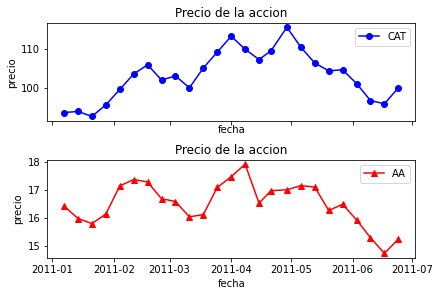

In [8]:
fig,(pan1,pan2) = plt.subplots(2,1, sharex=True, constrained_layout=True)

pan1.plot(df2.index, df2.CAT,
         color='blue',
         marker= 'o',
         linestyle='solid',
         label= 'CAT')

pan2.plot(df2.index, df2.AA,
         color='red',
         marker= '^',
         linestyle='solid',
         label= 'AA')

for pan in fig.get_axes():
    pan.set(xlabel= 'fecha',
           ylabel= 'precio',
           title='Precio de la accion')
    
pan1.legend()
pan2.legend()

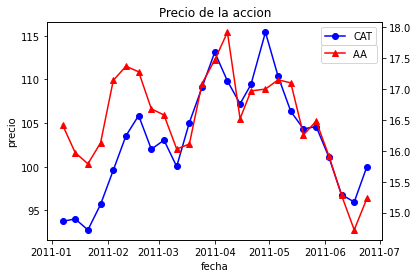

In [9]:
fig, pan1 = plt.subplots()


pan2=pan1.twinx()

pan1.plot(df2.index, df2.CAT,
         color='blue',
         marker= 'o',
         linestyle='solid',
         label= 'CAT')

pan2.plot(df2.index, df2.AA,
         color='red',
         marker= '^',
         linestyle='solid',
         label= 'AA  ')


pan1.set(xlabel= 'fecha',
        ylabel= 'precio',
        title='Precio de la accion')

pan1.legend(loc='upper left', bbox_to_anchor=(0.803, 1))
pan2.legend(loc='best', bbox_to_anchor=(1, 0.92))

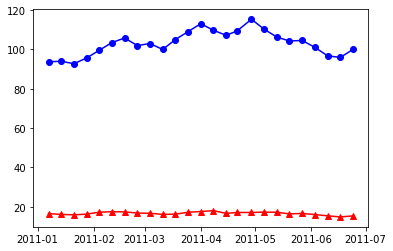

In [10]:
plt.plot(df2.index, df2.CAT,
         color='blue',
         marker= 'o',
         linestyle='solid',
         label= 'CAT')

plt.plot(df2.index, df2.AA,
         color='red',
         marker= '^',
         linestyle='solid',
         label= 'AA  ')

plt.show()

In [18]:
df2.corr() #matriz de correlacion, >0 --> si sube A, sube B ... <o, si sube A, baja B
df2.corr().loc['CAT'] #serie con las correlaciones de la accion CAT
mat_corr_pos = df2.corr().loc['CAT'][df2.corr().loc['CAT']>0.8].sort_values(ascending=False)
mat_corr_pos

accion
CAT    1.000000
DD     0.902856
VZ     0.890315
CVX    0.889416
MMM    0.806474
XOM    0.803195
Name: CAT, dtype: float64

Text(0.5, 1.0, 'correlación CAT')

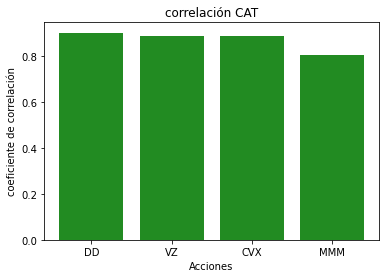

In [20]:
valores = mat_corr_pos[1:5]

plt.bar(valores.index, valores.values, color='forestgreen')
plt.xlabel('Acciones')
plt.ylabel('coeficiente de correlación')
plt.title('correlación CAT')